# Problem Statement:
### 1. Subsidy Inc. delivers subsidies to individuals based on their income.
### 2. Accurate income data is one of the hardest piece of data to obtain across the world.
### 3. Subsidy Inc. has obtained a large data set of authenticated data on individual income, demographic parameters, and a few financial parameters.
### 4. Subsidy Inc. wishes us to:
###        Develop an income classifier system for individuals.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("income.csv",na_values=["?"])

In [ ]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [ ]:
df.shape

(31978, 13)

## Step - 1:
###             Write the name of the variables with its datatype, description and categories of the variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [ ]:
#to display categorical values -> extracts object data type
df.describe(include ="O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,30169,31978,31978,30162,31978,31978,31978,31978,31978
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [ ]:
df['JobType'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: JobType, dtype: int64

In [ ]:
df['EdType'].value_counts()

HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: EdType, dtype: int64

In [ ]:
df['relationship'].value_counts()

Husband           12947
Not-in-family      8156
Own-child          5005
Unmarried          3384
Wife               1534
Other-relative      952
Name: relationship, dtype: int64

In [ ]:
df['race'].value_counts()

White                 27430
Black                  3028
Asian-Pac-Islander      956
Amer-Indian-Eskimo      311
Other                   253
Name: race, dtype: int64

In [ ]:
df['gender'].value_counts()

Male      21370
Female    10608
Name: gender, dtype: int64

In [ ]:
df['nativecountry'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [ ]:
df['SalStat'].value_counts()

 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: SalStat, dtype: int64

# Step 2, 3:
## Identify if data is clean and Look for missing values

In [ ]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [ ]:
#Droping Missing Values
df = df.dropna(axis=0)
df.shape

(30162, 13)

# Step 4:
## Identify variables influencing salary status and look for possible relationships between variables

In [ ]:
correlation =  df.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


#### Gender and Salary Status

In [ ]:
pd.crosstab(index = df["gender"], columns = df["SalStat"])

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,1112,8670
Male,6396,13984


<AxesSubplot:xlabel='count', ylabel='gender'>

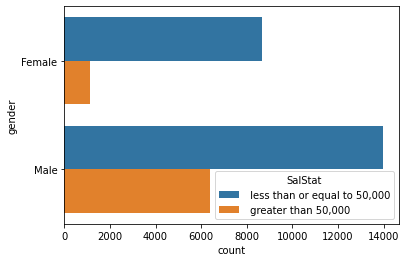

In [ ]:
sns.countplot(y=df['gender'],hue = 'SalStat', data=df)

#### Age and Salary Status

In [ ]:
pd.crosstab(index = df["age"], columns = df["SalStat"])

SalStat,"greater than 50,000","less than or equal to 50,000"
age,,
17,0,328
18,0,447
19,1,593
20,0,629
21,3,618
...,...,...
84,1,7
85,0,3
86,0,1


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='age'>

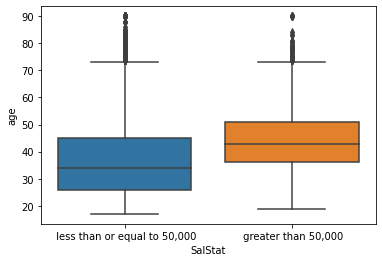

In [ ]:
sns.boxplot('SalStat','age',data = df)

#### Hours Per Week and Salary Status

In [ ]:
pd.crosstab(index = df["hoursperweek"], columns = df["SalStat"])``

SalStat,0,1
hoursperweek,,
1,6,1
2,13,2
3,23,1
4,25,2
5,32,6
...,...,...
95,1,1
96,4,1
97,1,1


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='hoursperweek'>

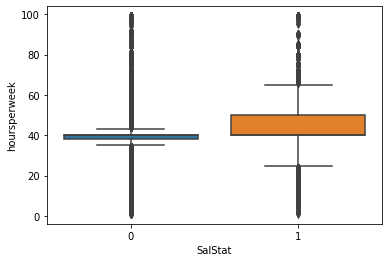

In [ ]:
sns.boxplot('SalStat','hoursperweek',data = df)

#### Job Type and Salary Status

In [ ]:
pd.crosstab(index = df["JobType"], columns = df["SalStat"])

SalStat,0,1
JobType,,
Federal-gov,578,365
Local-gov,1458,609
Private,17410,4876
Self-emp-inc,474,600
Self-emp-not-inc,1785,714
State-gov,935,344
Without-pay,14,0


<AxesSubplot:xlabel='count', ylabel='JobType'>

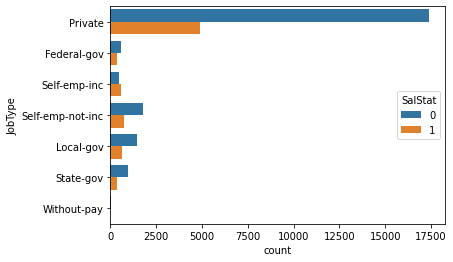

In [ ]:
sns.countplot(y=df['JobType'],hue = 'SalStat', data=df)

#### Education Type and Salary Status

In [ ]:
pd.crosstab(index = df["EdType"], columns = df['SalStat'])

SalStat,0,1
EdType,,
10th,761,59
11th,989,59
12th,348,29
1st-4th,145,6
5th-6th,276,12
7th-8th,522,35
9th,430,25
Assoc-acdm,752,256
Assoc-voc,963,344


<AxesSubplot:xlabel='count', ylabel='EdType'>

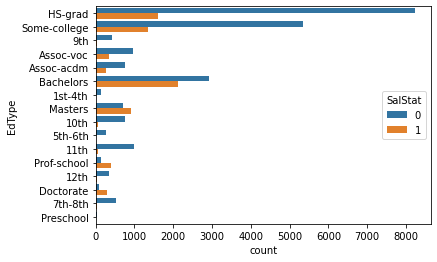

In [ ]:
sns.countplot(y=df['EdType'],hue = 'SalStat', data=df)

#### Occupation and Salary Status

In [ ]:
pd.crosstab(index = df["occupation"], columns =df['SalStat'])

SalStat,0,1
occupation,,
Adm-clerical,3223,498
Armed-Forces,8,1
Craft-repair,3122,908
Exec-managerial,2055,1937
Farming-fishing,874,115
Handlers-cleaners,1267,83
Machine-op-inspct,1721,245
Other-service,3080,132
Priv-house-serv,142,1


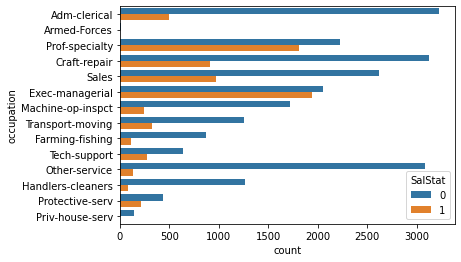

In [ ]:
Occupation  = sns.countplot(y=df['occupation'],hue = 'SalStat', data=df)

In [ ]:
df.groupby('SalStat')['age'].median()

SalStat
0    34.0
1    43.0
Name: age, dtype: float64

# Step 5:
## Applying Model

In [ ]:
# Reindexing the salary status names to 0,1
df['SalStat']=df['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

print(df['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [ ]:
income_data = pd.get_dummies(df, drop_first=True)
columns_list=list(income_data.columns)
features=list(set(columns_list)-set(['SalStat']))
income_data

['maritalstatus_Widowed', 'EdType_Preschool', 'nativecountry_Scotland', 'nativecountry_Peru', 'nativecountry_Yugoslavia', 'JobType_Self-emp-inc', 'occupation_Priv-house-serv', 'capitalloss', 'EdType_Masters', 'capitalgain', 'maritalstatus_Never-married', 'occupation_Prof-specialty', 'relationship_Wife', 'EdType_1st-4th', 'nativecountry_Outlying-US(Guam-USVI-etc)', 'relationship_Not-in-family', 'nativecountry_England', 'race_Black', 'hoursperweek', 'occupation_Farming-fishing', 'nativecountry_Japan', 'nativecountry_France', 'nativecountry_Jamaica', 'nativecountry_Honduras', 'JobType_Without-pay', 'nativecountry_Taiwan', 'age', 'nativecountry_China', 'nativecountry_Columbia', 'EdType_Some-college', 'JobType_Self-emp-not-inc', 'nativecountry_Vietnam', 'nativecountry_Ecuador', 'nativecountry_Poland', 'maritalstatus_Married-spouse-absent', 'nativecountry_Philippines', 'gender_Male', 'nativecountry_Dominican-Republic', 'occupation_Transport-moving', 'occupation_Exec-managerial', 'nativecount

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_Local-gov,JobType_Private,JobType_Self-emp-inc,JobType_Self-emp-not-inc,JobType_State-gov,...,nativecountry_Portugal,nativecountry_Puerto-Rico,nativecountry_Scotland,nativecountry_South,nativecountry_Taiwan,nativecountry_Thailand,nativecountry_Trinadad&Tobago,nativecountry_United-States,nativecountry_Vietnam,nativecountry_Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y=income_data['SalStat'].values
x = income_data[features].values
print(y)
print(x)

[0 0 1 ... 0 0 0]
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
target_names = ['<=50K', '>50K']

### REMOVING INSIGNIFICANT VARIABLES

In [ ]:
up_income_data = df.copy()
cols = ['gender','nativecountry','race','JobType']
modify_income_data = up_income_data.drop(cols,axis = 1)
updated_income=pd.get_dummies(modify_income_data, drop_first=True)
columns_list = list(updated_income.columns)
features = list(set(columns_list)-set(['SalStat']))

In [ ]:
y=updated_income['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [ ]:
x = updated_income[features].values
print(x)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3)

##  LogisticRegression

In [ ]:
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(train_x,train_y)
prediction_log = logistic_model.predict(test_x)

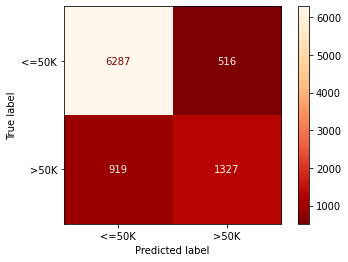

In [ ]:
cm = confusion_matrix(test_y, prediction_log.reshape(-1,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='OrRd_r')

In [ ]:
accuracy_score_log = accuracy_score(test_y, prediction_log)
print(accuracy_score_log)

0.8414189413194828


## KNeighborsClassifier

In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 10)
KNN_classifier.fit(train_x,train_y)
prediction_knn = KNN_classifier.predict(test_x)

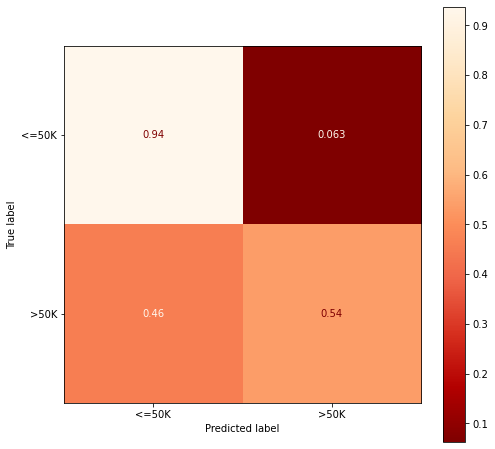

In [ ]:
cm = confusion_matrix(test_y, prediction_knn.reshape(-1,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='OrRd_r')

In [ ]:
accuracy_score_knn = accuracy_score(test_y, prediction_knn)
print(accuracy_score_knn)

0.8379931484141894


# Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(train_x, train_y)
prediction_rand = clf.predict(test_x)

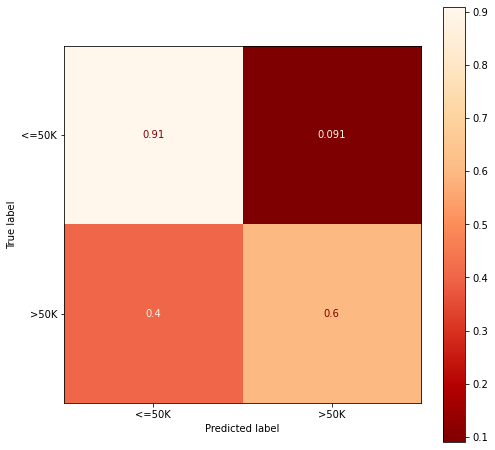

In [ ]:
cm = confusion_matrix(test_y, prediction_rand.reshape(-1,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='OrRd_r')

In [ ]:
accuracy_score_rand = accuracy_score(test_y, prediction_rand)
print(accuracy_score_rand)

0.8320256381920654


# Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
prediction_dec = dtc.predict(test_x)

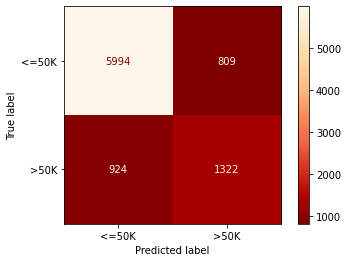

In [ ]:
cm = confusion_matrix(test_y, prediction_dec.reshape(-1,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='OrRd_r')

In [ ]:
accuracy_score_dec = accuracy_score(test_y, prediction_dec)
print(accuracy_score_dec)

0.808487125649243



| Model      | LogisticRegression | KNeighborsClassifier | Random Forest | Decision Tree |
| ----------- | ----------- |-------------|-------------|-------------|
| accuracy_score      | 0.8497071499613217 |0.8423030169079456 |0.8388772240026522 |0.8157807492540612|


- Thus, Logistic Regression gives best accuracy